If you do not have these libraries, you can install them via pip.

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


We need to load the following libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_log_error,mean_absolute_error

In [ ]:
from keras.models import Sequential
from keras.layers import Dropout,Dense,BatchNormalization ,LSTM ,GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [ ]:
import yfinance as yf
import datetime as time

get data as yahoo finance

In [ ]:
btc_data=yf.download("BTC-USD",start='2014-09-17',stop=time.date.today())

[*********************100%***********************]  1 of 1 completed


In [ ]:
min_date = str(btc_data.index.min())
max_date = str(btc_data.index.max())
print("We have collected Bitcoin stock price data from %s to %s (today)" %( min_date , max_date))

We have collected Bitcoin stock price data from 2014-09-17 00:00:00 to 2022-07-09 00:00:00 (today)


see the data shape

In [ ]:
print("our data have %d rows and %d columns(Features)"%(btc_data.shape[0],btc_data.shape[1]))

our data have 2853 rows and 6 columns(Features)


In [ ]:
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
btc_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2853.000000,2853.000000,2853.000000,2853.000000,2853.000000,2.853000e+03
mean,12441.680197,12765.434264,12078.177560,12447.427986,12447.427986,1.545276e+10
std,16579.352385,17007.557089,16082.420619,16574.983540,16574.983540,1.993066e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,636.030029,642.080017,625.271973,636.786011,636.786011,8.642840e+07
50%,6571.419922,6673.589844,6453.529785,6576.689941,6576.689941,5.862530e+09
75%,11532.400391,11841.957031,11288.200195,11555.363281,11555.363281,2.630151e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2853 entries, 2014-09-17 to 2022-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2853 non-null   float64
 1   High       2853 non-null   float64
 2   Low        2853 non-null   float64
 3   Close      2853 non-null   float64
 4   Adj Close  2853 non-null   float64
 5   Volume     2853 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 156.0 KB


In [ ]:
print(btc_data.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print("The dataset contains %d duplicate data"%(btc_data.duplicated().sum()))

The dataset contains 0 duplicate data


Text(1.0, 1.0, 'low values')

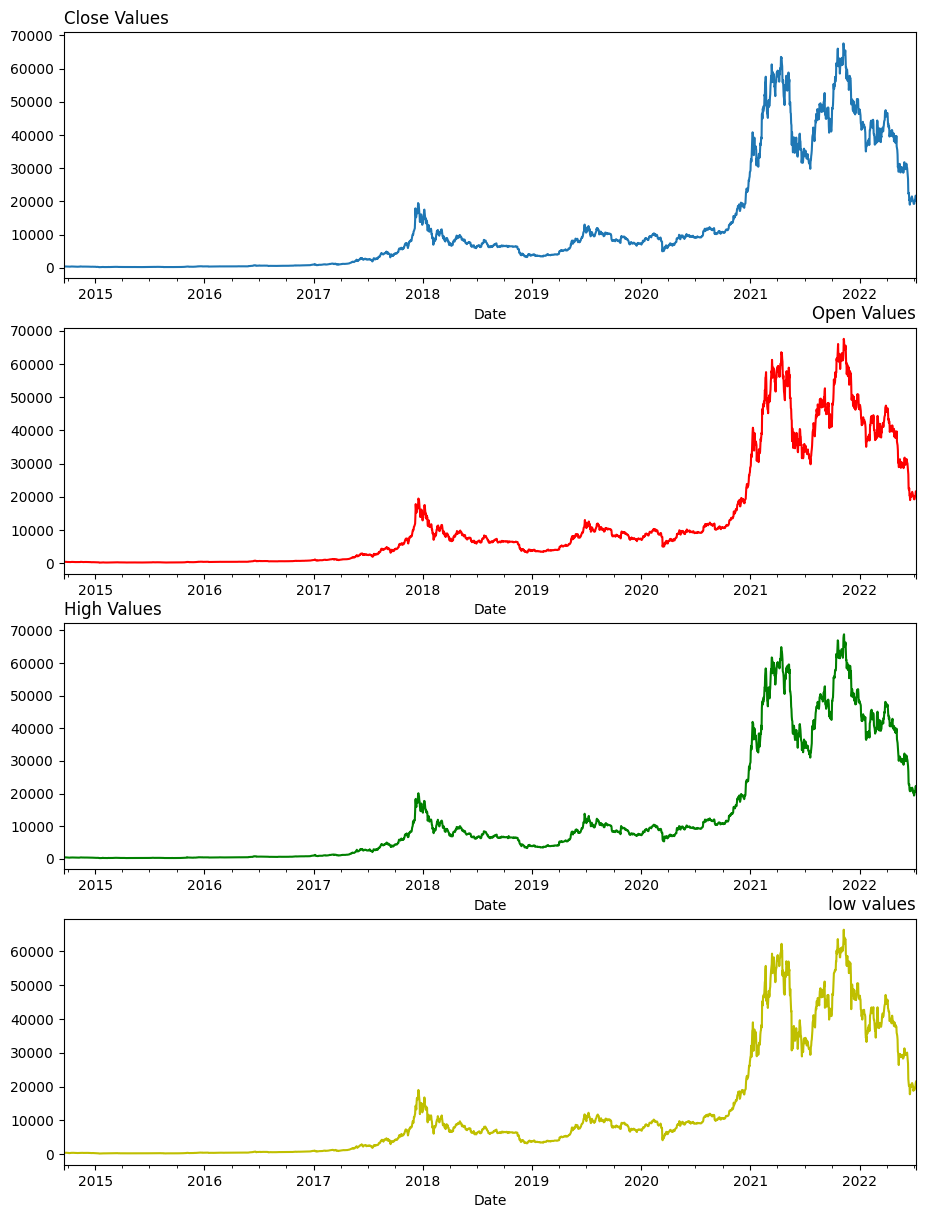

In [ ]:
plt.figure(figsize=(11,15),dpi=100)
plt.subplot(411)
btc_data.Close.plot()
plt.title("Close Values",loc="left")
plt.subplot(412)
btc_data.Open.plot(c="r")
plt.title("Open Values",loc="right")
plt.subplot(413)
btc_data.High.plot(c="g")
plt.title("High Values",loc="left")
plt.subplot(414)
btc_data.Low.plot(c="y")
plt.title("low values",loc="right")

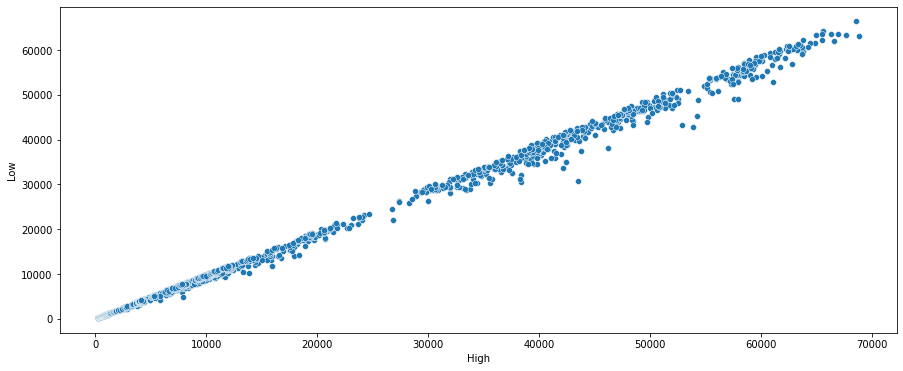

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x= btc_data.High, y= btc_data.Low)

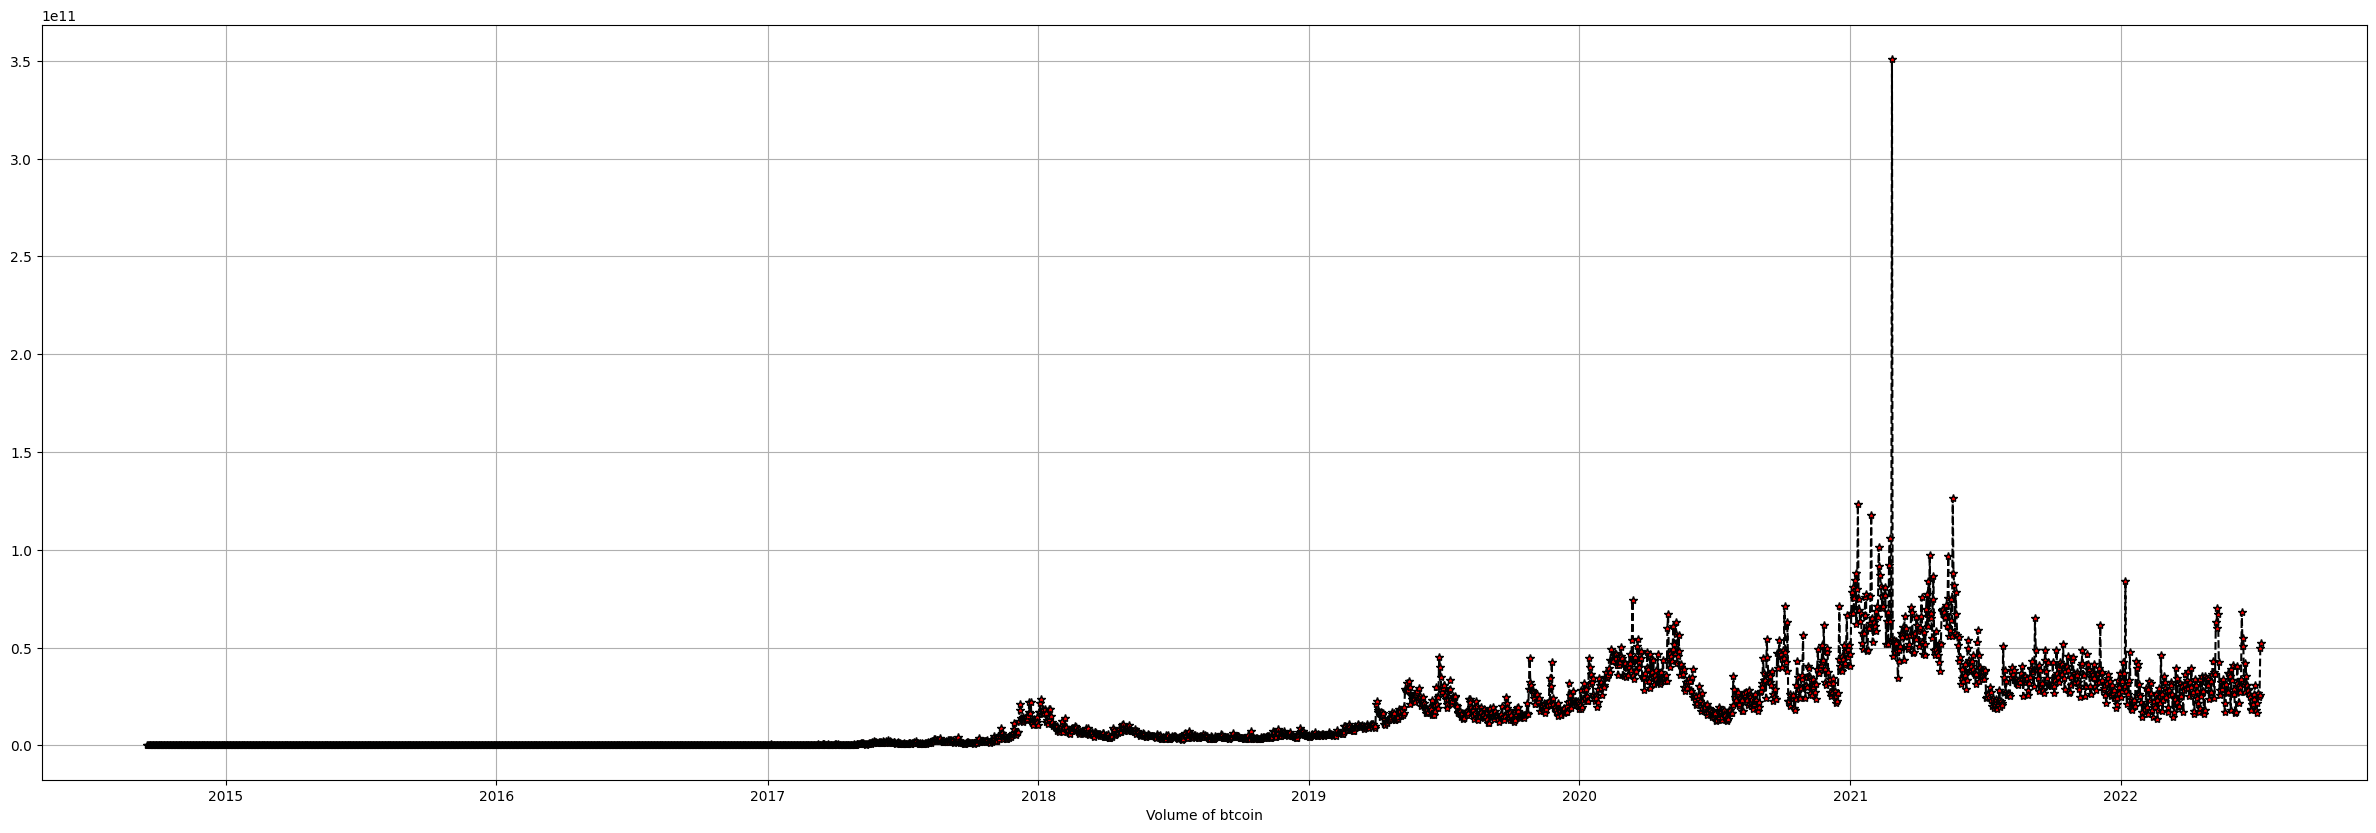

In [ ]:
plt.figure(figsize = (30,10),dpi = 100)  
plt.plot(btc_data["Volume"],linestyle = "--" , color = "k",marker = "*",markerfacecolor = "red")
plt.xlabel("Volume of btcoin")
plt.grid()

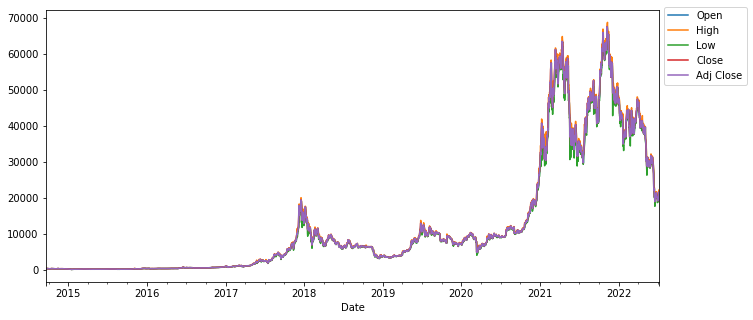

In [ ]:
btc_data.drop("Volume" , axis = 1).plot(figsize = (11,5))
plt.legend(bbox_to_anchor=(1,1.03))

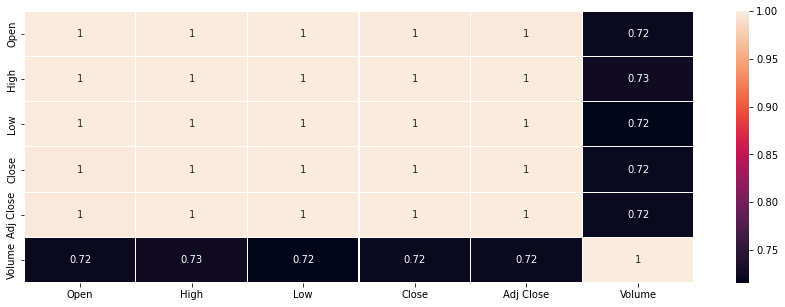

In [ ]:
plt.figure(figsize = (15,5))
c_df = btc_data.corr()
sns.heatmap(c_df ,annot =True , linewidths =0.1 )

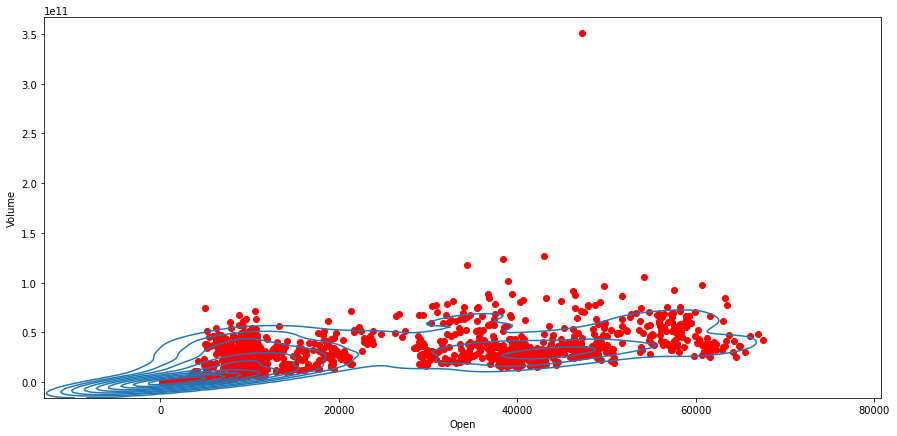

In [ ]:
plt.figure(figsize = (15,7))
sns.kdeplot(x ="Open" ,y ="Volume" ,data =btc_data)
plt.scatter(btc_data["Open"], btc_data["Volume"],color = "red")

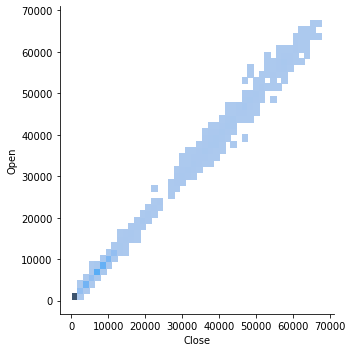

In [ ]:
sns.displot(data = btc_data ,x =btc_data["Close"], y =btc_data["Open"])

In [ ]:
fig = px.line(x= btc_data.index.values , y= btc_data["Low"])
fig.add_bar(x= btc_data.index.values , y= btc_data["High"])
fig.add_scatter(x= btc_data.index.values , y= btc_data["High"])
fig.add_bar(x= btc_data.index.values , y= btc_data["Low"])
fig.update_layout(font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green")
fig.update_xaxes(title_font_family="Arial")

train test split

In [ ]:
x = btc_data.drop("Close",axis=1)
y = btc_data.Close
x_full_train,x_test,y_full_train,y_test = train_test_split(x,y,test_size=0.2)

validation data

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_full_train,y_full_train,test_size=0.2)

In [ ]:
print("shape of x train  is :",x_train.shape)
print("shape of y train is  :", y_train.shape)

print("shape of x test is  :", x_test.shape)
print("shape of y test is  :", y_test.shape)


print("shape of x val is  :", x_val.shape)
print("shape of y val is  :", y_val.shape)


shape of x train  is : (1825, 5)
shape of y train is  : (1825,)
shape of x test is  : (571, 5)
shape of y test is  : (571,)
shape of x val is  : (457, 5)
shape of y val is  : (457,)


Construction of neural network(ann)

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(45,activation="relu"))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(60,activation="linear"))
ann_model.add(BatchNormalization())
ann_model.add(Dense(40,activation="relu"))
ann_model.add(Dense(1,activation="linear"))

compile NN

In [ ]:
ann_model.compile(optimizer="adam",loss="mean_squared_error")

Training neural network with data

In [ ]:
history = ann_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
58/58 [==============================] - 1s 6ms/step - loss: 442671040.0000 - val_loss: 427633440.0000
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 441755296.0000 - val_loss: 424902176.0000
Epoch 3/100
58/58 [==============================] - 0s 4ms/step - loss: 439496416.0000 - val_loss: 421246880.0000
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 435445536.0000 - val_loss: 415795904.0000
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 428975136.0000 - val_loss: 408347712.0000
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 420185568.0000 - val_loss: 397960032.0000
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 408053184.0000 - val_loss: 383558048.0000
Epoch 8/100
58/58 [==============================] - 0s 4ms/step - loss: 392740480.0000 - val_loss: 367677440.0000
Epoch 9/100
58/58 [==============================] - 0s 4ms/step - loss: 3741752

Schematic drawing of the model

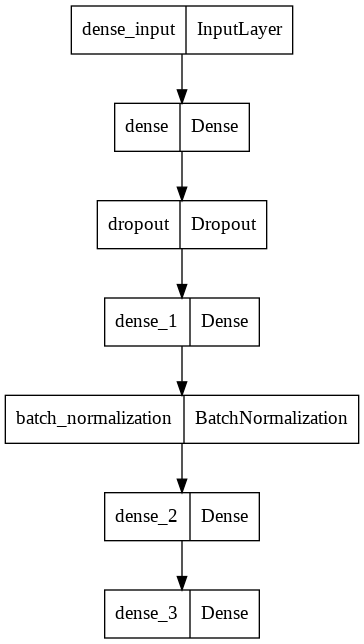

In [ ]:
plot_model(ann_model)

Drawing a graph of the process of changing the error rate of the model in each epoch of training:

1. The error rate on the training data has gradually decreased

2. The error rate on the validation data has gradually decreased  
  


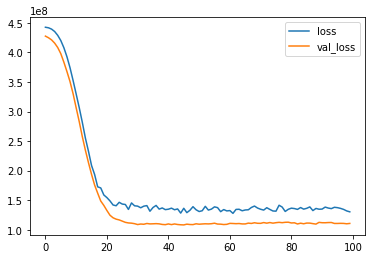

In [ ]:
pd.DataFrame(history.history).plot()

predict:

In [ ]:
y_pred = ann_model.predict(x_test)
y_=pd.DataFrame(data=y_pred,index=y_test.index,columns=["y_pred"])
y_["y_test"]=y_test.values


In [ ]:
y_.sort_index(inplace =True)

In [ ]:
fig = px.bar(x= y_.index.values , y= y_["y_test"])
fig.add_scatter(x= y_.index.values , y= y_["y_test"])

In [ ]:
fig = px.bar(x= y_.index.values , y= y_["y_pred"])
fig.add_scatter(x= y_.index.values , y= y_["y_pred"])

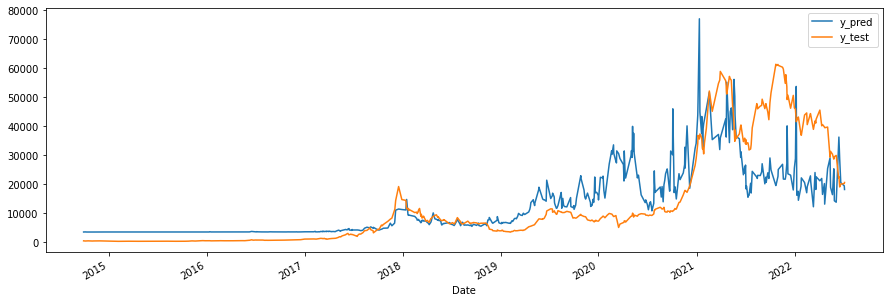

In [ ]:
y_.plot(figsize = (15,5))

Claculation model error using different metrics:

1.   r2_score
2.   mean_squared_log_error
3.   mean_absolute_error

In [ ]:
print("r2 score:" ,r2_score(y_["y_test"],y_["y_pred"]))
print("mean squared error: ", mean_squared_log_error(y_["y_test"],y_["y_pred"]))
print("mean absolute erroe:",mean_absolute_error(y_["y_test"],y_["y_pred"]))

r2 score: 0.5278549482791974
mean squared error:  1.6350380349087086
mean absolute erroe: 7082.549899446985


Create and fit the LSTM network

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
lstm_model.add(LSTM(15))
lstm_model.add(Dense(30))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1))

In [ ]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = lstm_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))


Epoch 1/100
58/58 [==============================] - 6s 43ms/step - loss: 442772960.0000 - val_loss: 428472544.0000
Epoch 2/100
58/58 [==============================] - 1s 12ms/step - loss: 442419392.0000 - val_loss: 428056384.0000
Epoch 3/100
58/58 [==============================] - 1s 12ms/step - loss: 441935360.0000 - val_loss: 427513024.0000
Epoch 4/100
58/58 [==============================] - 1s 12ms/step - loss: 441311136.0000 - val_loss: 426795744.0000
Epoch 5/100
58/58 [==============================] - 1s 12ms/step - loss: 440465152.0000 - val_loss: 425900160.0000
Epoch 6/100
58/58 [==============================] - 1s 12ms/step - loss: 439476224.0000 - val_loss: 424817280.0000
Epoch 7/100
58/58 [==============================] - 1s 13ms/step - loss: 438247232.0000 - val_loss: 423569664.0000
Epoch 8/100
58/58 [==============================] - 1s 13ms/step - loss: 436869184.0000 - val_loss: 422116256.0000
Epoch 9/100
58/58 [==============================] - 1s 13ms/step - loss

Schematic drawing of the model

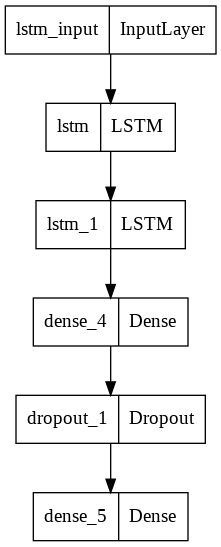

In [ ]:
plot_model(lstm_model)

Drawing a graph of the process of changing the error rate of the model in each epoch of training:

1. The error rate on the training data has gradually decreased

2. The error rate on the validation data has gradually decreased  
  


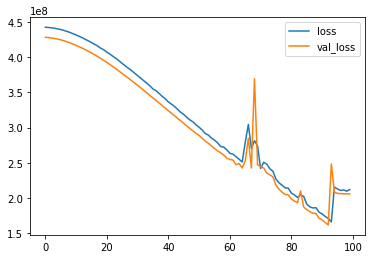

In [ ]:
pd.DataFrame(history.history).plot()

make predictions

In [ ]:
y_pred = lstm_model.predict(x_test)
y_lstm=pd.DataFrame(data=y_pred,index=y_test.index,columns=["y_pred"])
y_lstm["y_test"]=y_test.values
y_lstm.sort_index(inplace =True)

In [ ]:
fig = px.bar(x= y_lstm.index.values , y= y_lstm["y_pred"])
fig.add_scatter(x= y_lstm.index.values , y= y_lstm["y_pred"])

fig.add_bar(x= y_lstm.index.values , y= y_lstm["y_test"])
fig.add_scatter(x= y_lstm.index.values , y= y_lstm["y_test"])

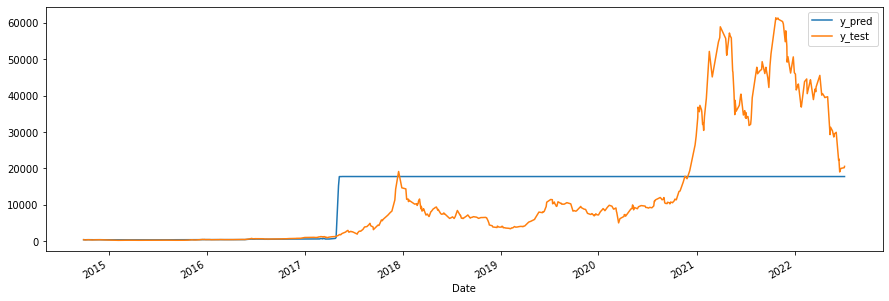

In [ ]:
y_lstm.plot(figsize = (15,5))

Claculation model error using different metrics:

1.   r2_score
2.   mean_squared_log_error
3.   mean_absolute_error

In [ ]:
print("r2 score:" ,r2_score(y_lstm["y_test"],y_lstm["y_pred"]))
print("mean squared error: ", mean_squared_log_error(y_lstm["y_test"],y_lstm["y_pred"]))
print("mean absolute erroe:",mean_absolute_error(y_lstm["y_test"],y_lstm["y_pred"]))

r2 score: 0.25484859679733984
mean squared error:  0.7146281692506509
mean absolute erroe: 9501.05085110372
